Train Data
      x          y
0  24.0  21.549452
1  50.0  47.464463
2  15.0  17.218656
3  38.0  36.586398
4  87.0  87.288984
y = -0.1072654643009865 + 1.0006563818563041 * X


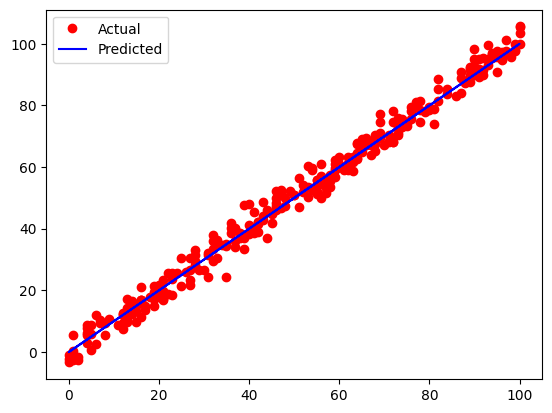

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# hypothesis
def h(x, c = 0, m = 0):
    return m * x + c

# calculate slope
def m(sigma_x, sigma_y, sigma_xy, sigma_xsq, n):
    ans = n * sigma_xy - sigma_x * sigma_y
    ans = ans / (n * sigma_xsq - sigma_x ** 2)
    return ans

# calculate intercept
def i(sigma_x, sigma_y, sigma_xy, sigma_xsq, n):
    ans = sigma_y * sigma_xsq - sigma_x * sigma_xy
    ans = ans / (n * sigma_xsq - sigma_x ** 2)
    return ans

# calculate terms
def calcTerms(X, y):
    n, = X.count()
    sigma_x = np.sum(np.asarray(X))
    sigma_y = np.sum(np.asarray(y))
    sigma_xy = np.sum(np.multiply(np.asarray(X), np.asarray(y)))
    sigma_xsq = np.sum(np.square(np.asarray(X)))
    return sigma_x, sigma_y, sigma_xy, sigma_xsq, n

# dataset
train_data = pd.read_csv('train.csv').dropna()
test_data = pd.read_csv('test.csv').dropna()

# Set X and y for training
X_train = pd.DataFrame(data = train_data['x'])
y = pd.DataFrame(data = train_data['y'])

# Set X_test and y_test for evaluation
X_test_data = pd.DataFrame(data = test_data['x'])
y_test = pd.DataFrame(data = test_data['y'])

# Let's see what we have
print("Train Data")
print(train_data.head())

# train
def train(X, y):
    sigma_x, sigma_y, sigma_xy, sigma_xsq, n = calcTerms(X, y)
    return i(sigma_x, sigma_y, sigma_xy, sigma_xsq, n), m(sigma_x, sigma_y, sigma_xy, sigma_xsq, n)

# predict
def predict(X, slope, intercept):
    X_array = np.asarray(X)
    y = slope * X_array + intercept
    return y

# plot
def plotOutput(X, y, yPred):
    plt.plot(np.asarray(X).flatten(), np.asarray(y).flatten(), 'ro', label='Actual')
    plt.plot(np.asarray(X).flatten(), np.asarray(yPred).flatten(), 'b-', label='Predicted')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    intercept, slope = train(X_train, y)
    print("y =", intercept, "+", slope, "* X")
    y_predicted = predict(X_test_data, slope, intercept)
    plotOutput(X_test_data, y_test, y_predicted)